In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

WOŁOWINA

In [ ]:
beef_path = 'BEEF.csv'

beef_df = pd.read_csv(beef_path)

print(beef_df.head())

                        Date  Open  High   Low  Close    Volume  Dividends  \
0  2024-04-04 00:00:00-03:00  6.77  6.82  6.69   6.71  11698300        0.0   
1  2024-04-05 00:00:00-03:00  6.71  6.76  6.55   6.62   8445700        0.0   
2  2024-04-08 00:00:00-03:00  6.65  6.66  6.57   6.60   7657500        0.0   
3  2024-04-09 00:00:00-03:00  6.60  6.72  6.52   6.56   9762700        0.0   
4  2024-04-10 00:00:00-03:00  6.52  6.57  6.42   6.46  12493000        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [ ]:
beef_data = beef_df['Close']
logret_beef_data =  np.log(beef_data / beef_data.shift(1))

CEBULA

In [ ]:
onion_path = 'ONION.csv'

onion_df = pd.read_csv(onion_path)

print(onion_df.head())

                        Date      Open      High       Low     Close  Volume  \
0  2024-04-05 00:00:00+00:00  0.060301  0.060412  0.058137  0.059733       0   
1  2024-04-06 00:00:00+00:00  0.059733  0.061251  0.059417  0.060663       0   
2  2024-04-07 00:00:00+00:00  0.060663  0.061815  0.060606  0.061056       0   
3  2024-04-08 00:00:00+00:00  0.061056  0.063966  0.060853  0.063054       0   
4  2024-04-09 00:00:00+00:00  0.063054  0.063127  0.060145  0.060853       0   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [12]:
onion_data = onion_df['Close']
logret_onion_data =  np.log(onion_data / onion_data.shift(1))

POMIDOR

In [13]:
tomato_path = 'TOMATO.csv'

tomato_df = pd.read_csv(tomato_path)

print(tomato_df.head())

                        Date         Open         High          Low  \
0  2024-04-04 00:00:00+09:00  1183.058238  1190.727983  1171.553620   
1  2024-04-05 00:00:00+09:00  1177.305842  1184.016869  1167.718661   
2  2024-04-08 00:00:00+09:00  1177.305830  1185.934293  1175.388394   
3  2024-04-09 00:00:00+09:00  1179.223322  1180.182041  1172.512295   
4  2024-04-10 00:00:00+09:00  1176.347202  1179.223356  1171.553611   

         Close  Volume  Dividends  Stock Splits  
0  1188.810547   19800        0.0           0.0  
1  1174.429688   20200        0.0           0.0  
2  1179.223267   13700        0.0           0.0  
3  1176.347168   13800        0.0           0.0  
4  1172.512329   13400        0.0           0.0  


In [14]:
tomato_data = tomato_df['Close']
logret_tomato_data =  np.log(tomato_data / tomato_data.shift(1))

# Ad. 1

## MIARY ZMIENNOŚCI

In [ ]:
def calculate_volatility_metrics(prices, freq=252, window=30):

    log_returns = np.log(prices / prices.shift(1)).dropna()
    
    volatility_metrics = {
        'Stdev (log returns)': np.std(log_returns),
        'Variance (log returns)': np.var(log_returns),
        'Mean Absolute Deviation': np.mean(np.abs(log_returns - np.mean(log_returns))),
        'Annualized Volatility': np.std(log_returns) * np.sqrt(freq),
        'Max Drawdown': (prices / prices.cummax() - 1).min(),
        'Rolling Volatility (last 30d)': log_returns.rolling(window).std().iloc[-1],
        'Skewness': skew(log_returns),
        'Kurtosis': kurtosis(log_returns),
        'Autocorrelation (lag 1)': log_returns.autocorr(lag=1)
    }

    volatility_df = pd.DataFrame.from_dict(volatility_metrics, orient='index', columns=['Value'])
    volatility_df['Value'] = volatility_df['Value'] * 100
    
    return volatility_df

In [5]:
print(calculate_volatility_metrics(beef_data))

                                    Value
Stdev (log returns)              2.751932
Variance (log returns)           0.075731
Mean Absolute Deviation          2.043706
Annualized Volatility           43.685560
Max Drawdown                   -46.037735
Rolling Volatility (last 30d)    2.924036
Skewness                        -4.331932
Kurtosis                       153.563594
Autocorrelation (lag 1)         -0.291311


In [ ]:
ingredients = {
    'beef': beef_data.squeeze(),    
    'onion': onion_data.squeeze(),
    'potato': tomato_data.squeeze()
}

volatility_results = pd.DataFrame()

for name, series in ingredients.items():
    metrics = calculate_volatility_metrics(series)
    metrics.columns = [name]  
    if volatility_results.empty:
        volatility_results = metrics
    else:
        volatility_results = pd.concat([volatility_results, metrics], axis=1)

display(volatility_results.style.format("{:.2f}%"))


,beef,onion,potato
Stdev (log returns),2.75%,13.94%,1.46%
Variance (log returns),0.08%,1.94%,0.02%
Mean Absolute Deviation,2.04%,4.31%,0.81%
Annualized Volatility,43.69%,221.33%,23.22%
Max Drawdown,-46.04%,-85.24%,-19.03%
Rolling Volatility (last 30d),2.92%,1.91%,1.08%
Skewness,-4.33%,-98.78%,-236.64%
Kurtosis,153.56%,3770.92%,2842.14%
Autocorrelation (lag 1),-0.29%,-28.58%,-4.72%


## KWANTYLE

In [ ]:
def calculate_quantiles(prices, quantiles=[0.05, 0.25, 0.5, 0.75, 0.95]):

    log_returns = np.log(prices / prices.shift(1)).dropna()

    quantile_values = {f"Q{int(q*100)}": prices.quantile(q) for q in quantiles}
    
    return quantile_values

In [7]:
print(calculate_quantiles(beef_data))

{'Q5': 4.545500087738037, 'Q25': 5.505000114440918, 'Q50': 6.099999904632568, 'Q75': 6.550000190734863, 'Q95': 7.498999977111816}


In [ ]:
quantile_results = pd.DataFrame()

for name, series in ingredients.items():
    q_values = calculate_quantiles(series)
    q_df = pd.DataFrame.from_dict(q_values, orient='index', columns=[name])
    
    if quantile_results.empty:
        quantile_results = q_df
    else:
        quantile_results = pd.concat([quantile_results, q_df], axis=1)

display(quantile_results.style.format("{:.2f}"))

,beef,onion,potato
Q5,4.55,0.01,1093.76
Q25,5.51,0.02,1130.33
Q50,6.10,0.03,1178.26
Q75,6.55,0.04,1199.18
Q95,7.50,0.06,1252.09


## DYSTRYBUANTA

In [ ]:
def plot_cdf(data, title = ''):
    sorted_data = np.sort(data)
    
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    plt.figure(figsize=(8, 6))
    plt.plot(sorted_data, cdf, marker='.', linestyle='none', color='blue')
    
    plt.title(f"Dystrybuanta (CDF) {title}")
    plt.xlabel("Wahanie cen")
    plt.ylabel("Prawdopodobieństwo skumulowane")
    plt.grid(True)
    plt.show()

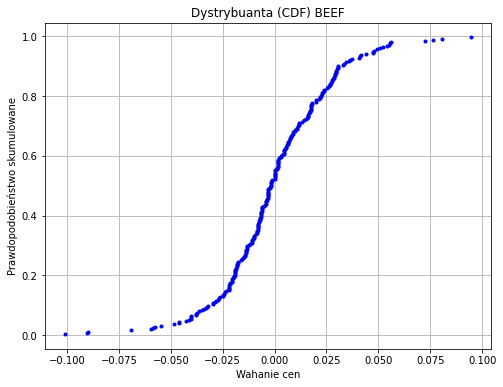

In [9]:
plot_cdf(logret_beef_data, "BEEF")

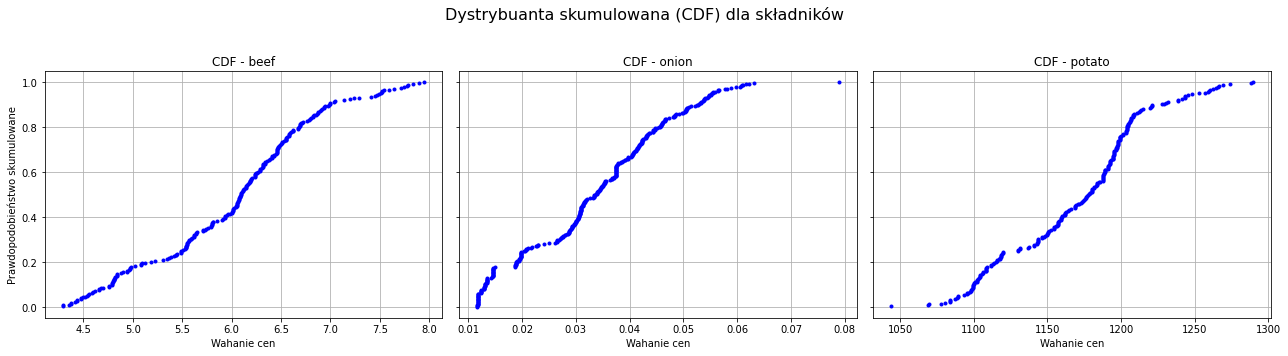

In [ ]:
def plot_multiple_cdfs(data_dict):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

    for ax, (name, data) in zip(axes, data_dict.items()):
        sorted_data = np.sort(data)
        cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        
        ax.plot(sorted_data, cdf, marker='.', linestyle='none', color='blue')
        ax.set_title(f"CDF - {name}")
        ax.set_xlabel("Wahanie cen")
        ax.grid(True)
    
    axes[0].set_ylabel("Prawdopodobieństwo skumulowane")
    plt.suptitle("Dystrybuanta skumulowana (CDF) dla składników", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

data_dict = {
    'beef': beef_data.squeeze(),    
    'onion': onion_data.squeeze(),
    'potato': tomato_data.squeeze()
}

plot_multiple_cdfs(data_dict)